In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from math import pi
from pandas.plotting import parallel_coordinates
sns.set(color_codes = True)
%matplotlib inline

In [3]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14684 entries, 0 to 14683
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           14684 non-null  object 
 1   is_canceled                     14684 non-null  int64  
 2   lead_time                       14684 non-null  int64  
 3   arrival_date_year               14684 non-null  int64  
 4   arrival_date_month              14684 non-null  object 
 5   arrival_date_week_number        14684 non-null  int64  
 6   arrival_date_day_of_month       14684 non-null  int64  
 7   stays_in_weekend_nights         14684 non-null  int64  
 8   stays_in_week_nights            14684 non-null  int64  
 9   adults                          14683 non-null  float64
 10  children                        14683 non-null  float64
 11  babies                          14683 non-null  float64
 12  meal                            

In [6]:
df.skew()

<ipython-input-6-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


is_canceled                       -0.836245
lead_time                          0.957149
arrival_date_year                 -0.037449
arrival_date_week_number          -0.102737
arrival_date_day_of_month          0.004230
stays_in_weekend_nights            1.630325
stays_in_week_nights               2.759290
adults                            31.322782
children                           3.415234
babies                             9.951011
is_repeated_guest                 85.673799
previous_cancellations            14.179946
previous_bookings_not_canceled    15.127899
booking_changes                    5.719585
agent                             -0.669880
company                            0.415244
days_in_waiting_list              10.756134
adr                                1.104338
required_car_parking_spaces        4.011556
total_of_special_requests          1.364616
dtype: float64

In [7]:
df.kurtosis()

<ipython-input-7-c7edf97eb14c>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


is_canceled                         -1.300872
lead_time                            0.436876
arrival_date_year                   -1.206075
arrival_date_week_number            -0.839946
arrival_date_day_of_month           -1.216722
stays_in_weekend_nights             11.357224
stays_in_week_nights                23.221394
adults                            1348.849938
children                            16.915483
babies                             104.394739
is_repeated_guest                 7338.999455
previous_cancellations             227.200082
previous_bookings_not_canceled     300.779177
booking_changes                     74.564391
agent                                2.416705
company                              0.155379
days_in_waiting_list               118.952609
adr                                  0.866354
required_car_parking_spaces         14.582093
total_of_special_requests            1.275209
dtype: float64

<ipython-input-8-e7e9ed3b5720>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lead_time'])


<Axes: xlabel='lead_time', ylabel='Density'>

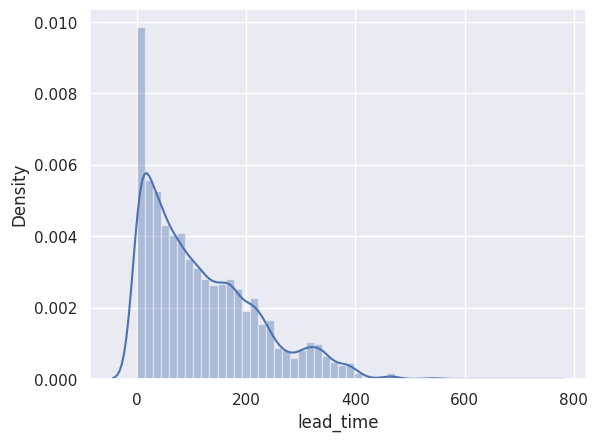

In [8]:
sns.distplot(df['lead_time'])

<Axes: xlabel='hotel', ylabel='lead_time'>

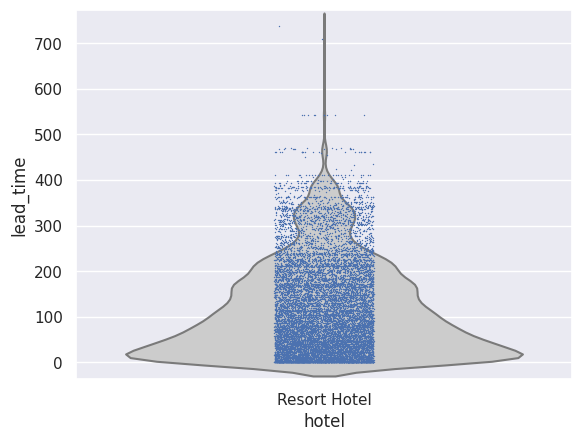

In [9]:
sns.violinplot(x="hotel", y="lead_time", data=df, inner=None, color=".8")
sns.stripplot(x="hotel", y="lead_time", data=df, size=1)

In [12]:
df = pd.read_csv("wine-quality.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
sns.set(font_scale=1.1)
sns.set_style('ticks')
sns.pairplot(df, diag_kind="kde")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [14]:
df.cov()

<ipython-input-14-6f98a29763d5>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.681560,0.047012,0.060971,-0.693045,0.013564,-6.524162,-24.162531,0.001786,-0.052524,0.057990,-0.147911,-0.087224
volatile acidity,0.047012,0.027109,-0.009043,-0.154122,0.002177,-1.032411,-3.861743,0.000134,0.006898,0.005526,-0.007509,-0.038246
citric acid,0.060971,-0.009043,0.021102,0.098498,0.000200,0.344101,1.602662,0.000042,-0.007675,0.001245,-0.001808,0.010874
residual sugar,-0.693045,-0.154122,0.098498,22.639751,-0.021493,34.060547,133.334227,0.007884,-0.204174,-0.131562,-2.041388,-0.153011
chlorides,0.013564,0.002177,0.000200,-0.021493,0.001228,-0.121269,-0.553673,0.000038,0.000252,0.002061,-0.010735,-0.006145
free sulfur dioxide,-6.524162,-1.032411,0.344101,34.060547,-0.121269,315.041192,723.261972,0.001369,-0.414329,-0.497973,-3.807165,0.859664
total sulfur dioxide,-24.162531,-3.861743,1.602662,133.334227,-0.553673,723.261972,3194.720039,0.005491,-2.159577,-2.316258,-17.914646,-2.042704
density,0.001786,0.000134,0.000042,0.007884,0.000038,0.001369,0.005491,0.000009,0.000006,0.000116,-0.002456,-0.000801
pH,-0.052524,0.006898,-0.007675,-0.204174,0.000252,-0.414329,-2.159577,0.000006,0.025840,0.004575,0.023203,0.002719
sulphates,0.057990,0.005526,0.001245,-0.131562,0.002061,-0.497973,-2.316258,0.000116,0.004575,0.022146,-0.000579,0.005032


In [16]:
df.corr(method='pearson')

<ipython-input-16-432dd9d4238b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


<ipython-input-17-20fe0d0692f4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='viridis')


<Axes: >

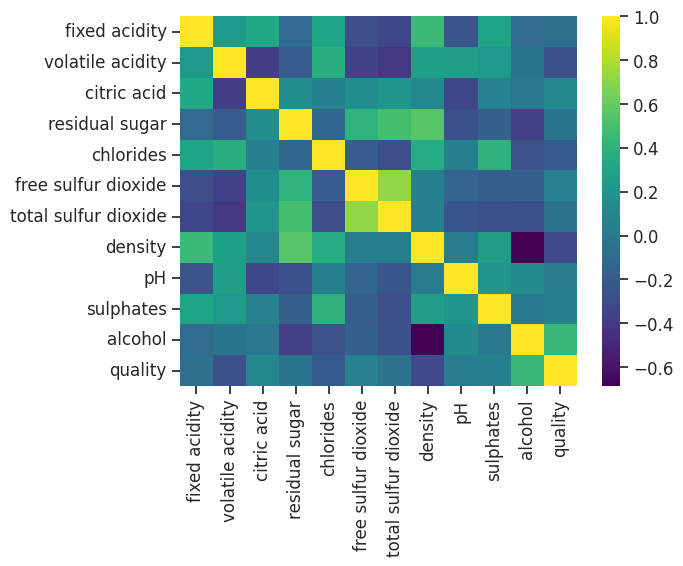

In [17]:
sns.heatmap(df.corr(), cmap='viridis')

<ipython-input-18-55be9c6178f4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1)


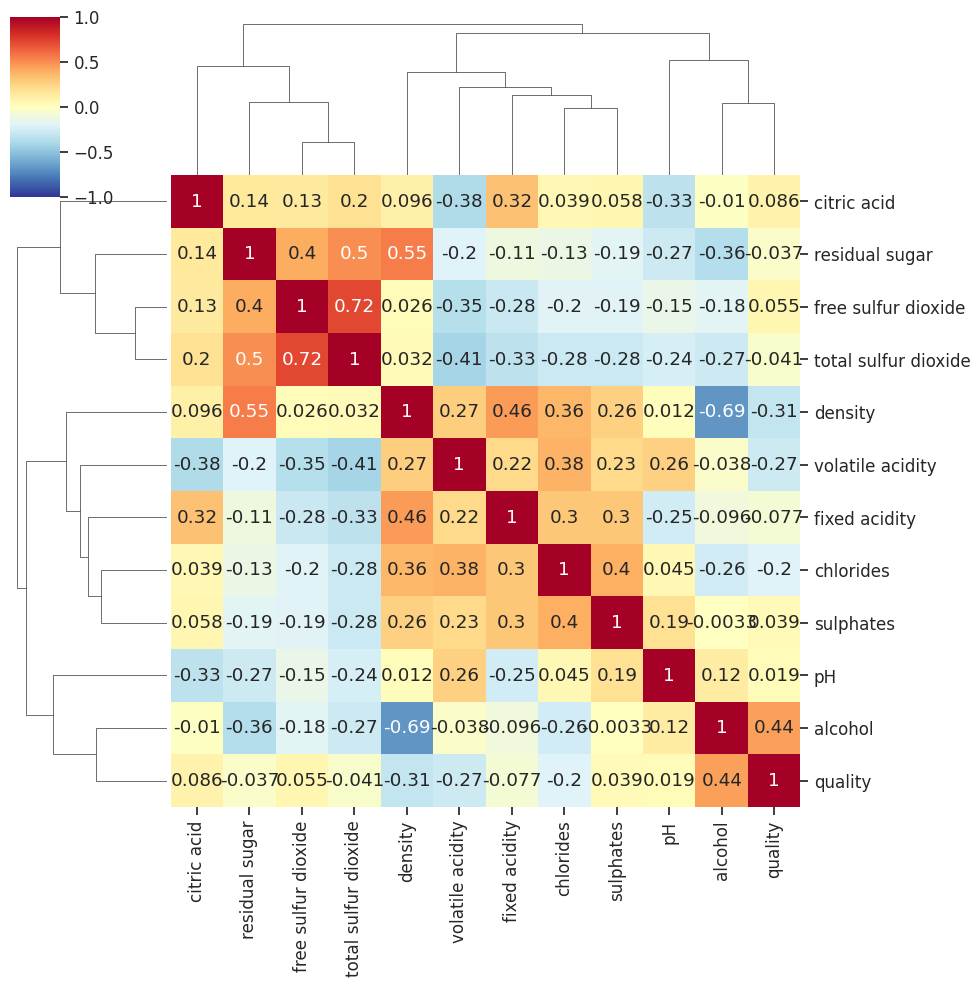

In [18]:
sns.clustermap(df.corr(), annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1)

<ipython-input-21-83580bd879f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.triu(np.ones_like(df.corr()))
<ipython-input-21-83580bd879f8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
<ipython-input-21-83580bd879f8>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Text(0.5, 1.0, 'Wine Quality Correlation')

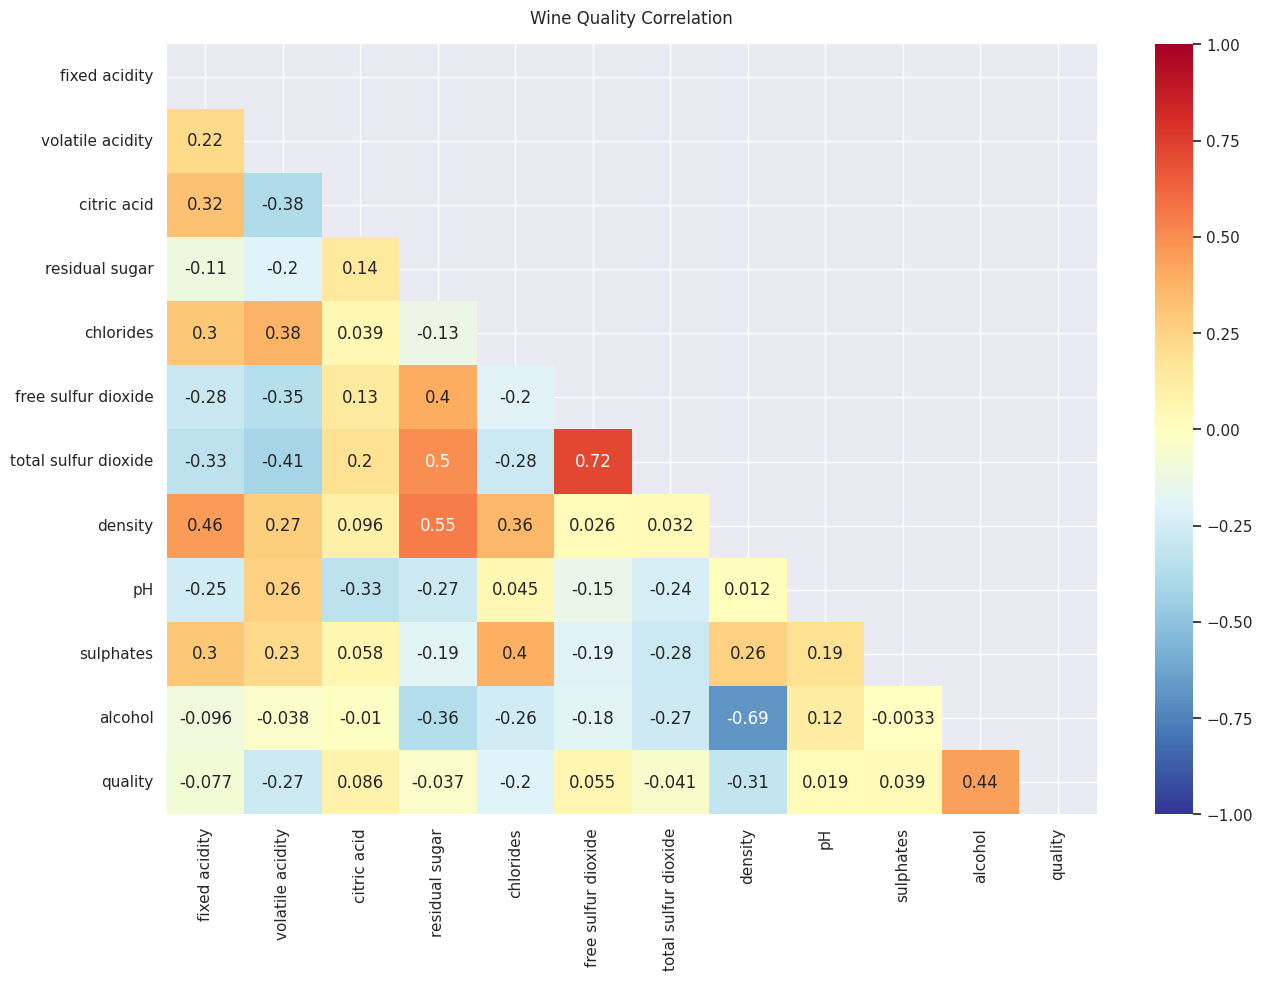

In [21]:
np.triu(np.ones_like(df.corr()))

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(),
            mask=mask,
            vmin=-1,
            vmax = 1,
            annot=True,
            cmap="RdYlBu_r",
            cbar = True)
ax.set_title('Wine Quality Correlation', pad = 15)

In [24]:
df = pd.read_csv("superstore.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [26]:
df['Date2'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True)
df = df.sort_values(by='Date2')
df['Year'] = df['Date2'].dt.year

df_line = df[df.Year == 2018]
df_line = df_line.groupby('Date2')['Sales'].sum().reset_index()
df_line.head()

<ipython-input-26-8df69cf7e504>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date2'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True)


,Date2,Sales
0,2018-01-01,1481.828
1,2018-01-04,5972.988
2,2018-01-05,4108.370
3,2018-01-06,586.042
4,2018-01-07,639.830


<Axes: xlabel='Date2'>

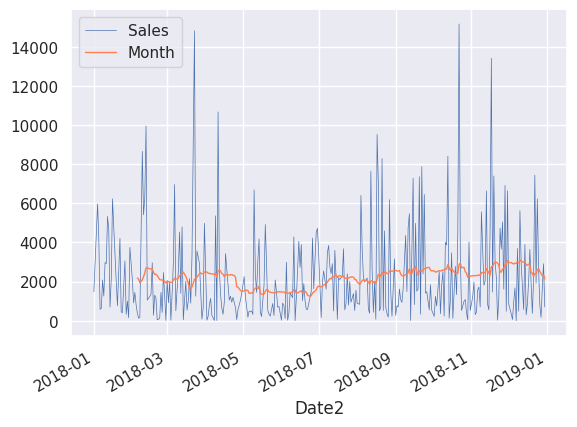

In [28]:
df_line['Month'] = df_line['Sales'].rolling(window=30).mean()

ax = df_line.plot(x='Date2', y='Sales', linewidth="0.5")
df_line.plot(x='Date2', y='Month', color='#FF7F50', linewidth='1', ax=ax)

In [29]:
df_bar_1 = df.groupby('Year')['Sales'].sum().reset_index()
df_bar_1.head()

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


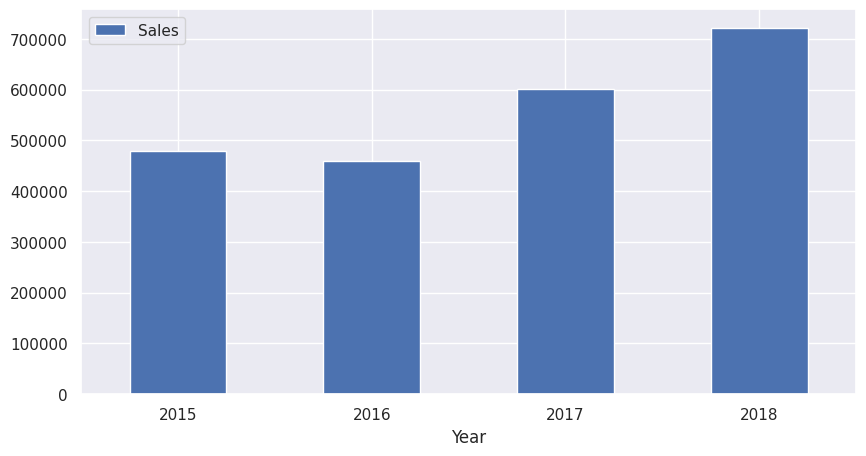

In [30]:
ax = df_bar_1.plot.bar(x='Year', y='Sales', rot=0, figsize=(10,5))

In [34]:
df_bar_2 = df.groupby(['Year', 'Segment'])['Sales'].sum().reset_index()

df_bar_2_pv = df_bar_2.pivot(index='Year',
                             columns='Segment',
                             values='Sales').reset_index()

df_bar_2_pv.head()

Segment,Year,Consumer,Corporate,Home Office
0,2015,262956.8006,127797.4957,89101.9118
1,2016,265356.2933,119675.5989,74404.1132
2,2017,291142.9652,204977.3178,104072.2670
3,2018,328604.4719,236043.6624,157403.8849


<Axes: xlabel='Year'>

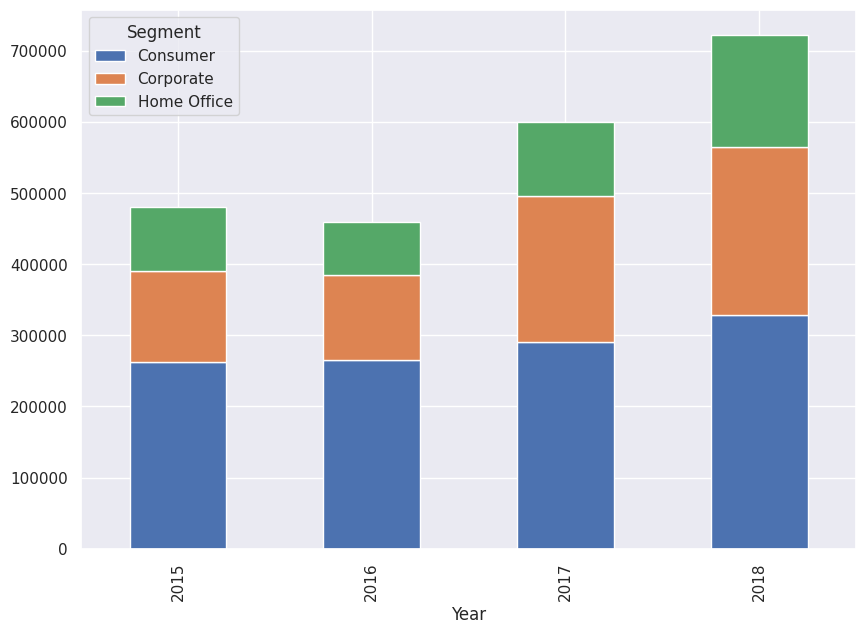

In [35]:
df_bar_2_pv.plot.bar(x='Year', stacked=True, figsize=(10, 7))

In [38]:
df = pd.read_csv("nba2021_advanced.csv")
df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,408,15.1,0.599,0.000,0.541,...,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,17,-6.9,0.125,0.250,0.000,...,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,760,15.9,0.592,0.006,0.397,...,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,873,22.7,0.641,0.015,0.469,...,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,480,15.2,0.542,0.298,0.093,...,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


In [43]:
df1 = df[df['Tm'].isin(['ATL', 'BOS', 'BRK', 'CHI', 'CHO'])]
df1 = df[['Tm', 'ORB%', 'TRB%', 'AST%', 'BLK%', 'USG%']]
df1 = df1.groupby('Tm').mean()
df1.head()

,ORB%,TRB%,AST%,BLK%,USG%
Tm,,,,,
ATL,5.250000,10.400000,13.893750,1.718750,18.412500
BOS,5.681250,10.362500,12.881250,2.437500,18.325000
BRK,4.394737,10.547368,15.210526,2.147368,18.868421
CHI,4.482353,10.976471,13.500000,1.405882,17.582353
CHO,7.628571,11.742857,14.900000,2.764286,19.357143


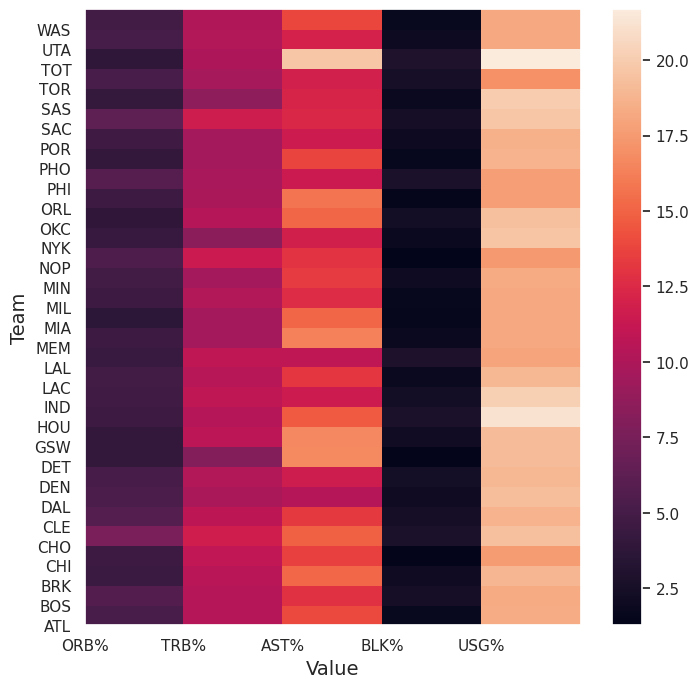

In [44]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
plt.pcolor(df1.values)

plt.xticks(range(len(df1.columns)),df1.columns)
plt.yticks(range(len(df1.index)), df1.index)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.colorbar()
plt.show()

In [45]:
df2 = df[df['Tm'].isin(['ATL', 'BOS', 'BRK', 'CHI', 'CHO'])]
df2 = df2[['Tm', 'Age', 'G']]
df2 = df2.groupby(['Tm', 'Age']).mean().reset_index()

df2 = df2.pivot(index='Tm', columns='Age', values='G')
df2.head()

Age,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34
Tm,,,,,,,,,,,,,,,
ATL,NaN,9.0,24.0,23.000000,16.250000,NaN,22.000000,25.0,NaN,9.0,21.5,NaN,NaN,16.0,14.0
BOS,NaN,NaN,13.0,20.000000,17.333333,26.0,6.000000,22.0,18.0,26.0,26.0,13.0,NaN,23.0,NaN
BRK,NaN,14.0,NaN,8.500000,26.000000,26.0,15.000000,12.0,3.0,16.5,30.0,NaN,16.0,23.5,30.0
CHI,26.0,27.0,8.5,15.000000,14.000000,7.0,16.500000,11.0,19.5,6.0,16.0,NaN,NaN,23.0,26.0
CHO,15.5,NaN,NaN,22.333333,9.000000,NaN,21.666667,26.0,NaN,20.5,NaN,26.0,NaN,NaN,NaN


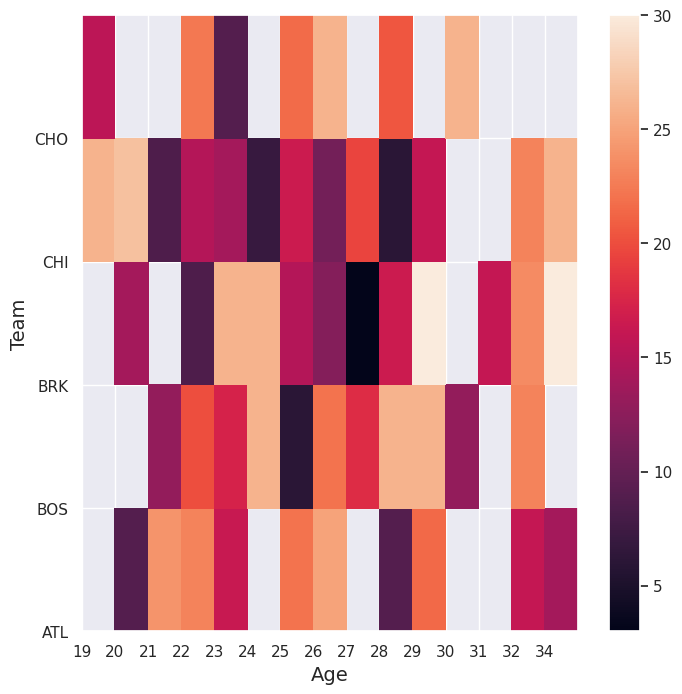

In [46]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

plt.pcolor(df2.values)
plt.xticks(range(len(df2.columns)),df2.columns)
plt.yticks(range(len(df2.index)), df2.index)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.colorbar()
plt.show()

In [47]:
df3 = df1.reset_index()
df3.head()

,Tm,ORB%,TRB%,AST%,BLK%,USG%
0,ATL,5.250000,10.400000,13.893750,1.718750,18.412500
1,BOS,5.681250,10.362500,12.881250,2.437500,18.325000
2,BRK,4.394737,10.547368,15.210526,2.147368,18.868421
3,CHI,4.482353,10.976471,13.500000,1.405882,17.582353
4,CHO,7.628571,11.742857,14.900000,2.764286,19.357143


<ipython-input-50-8d7ed5931b0c>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(df3.index))


ValueError: ignored

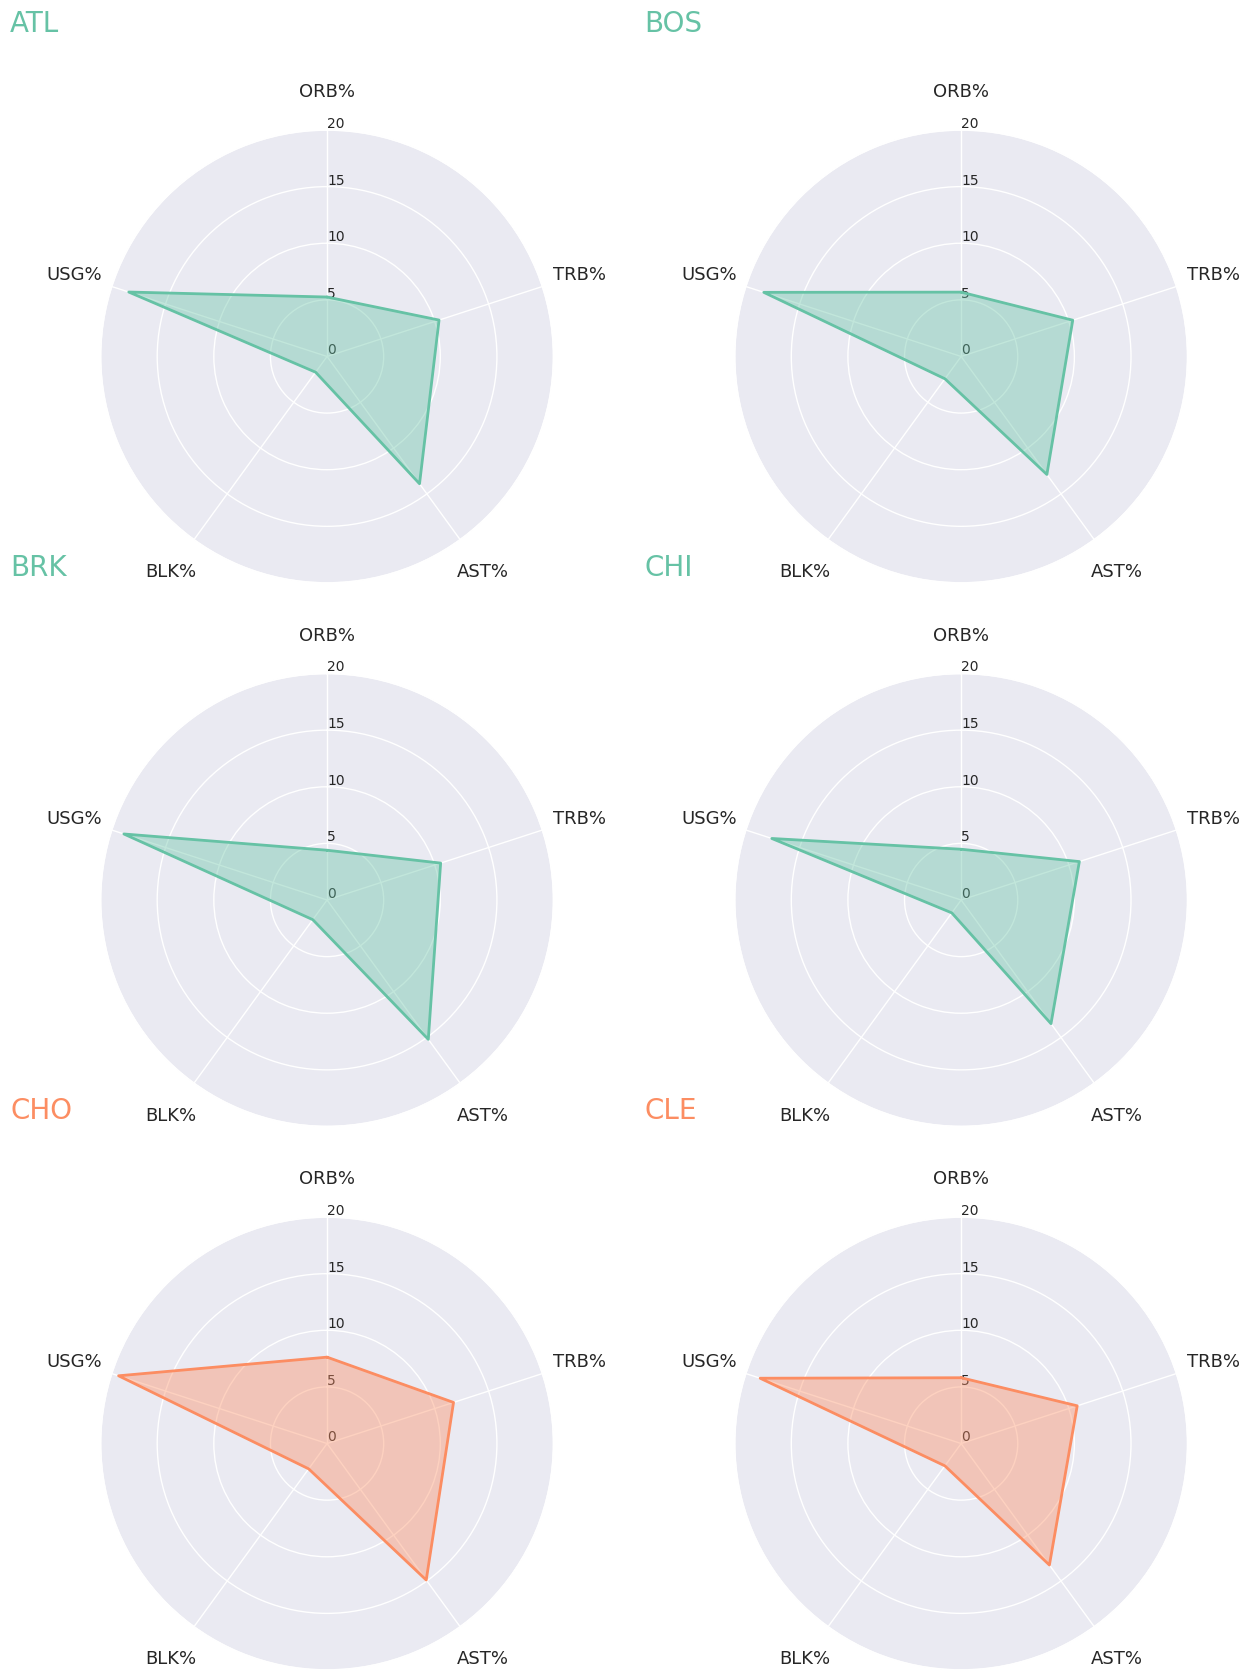

In [50]:
labels = df3.columns[1:]
num_labels = len(labels)

angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
angles += angles[:1]

my_palette = plt.cm.get_cmap("Set2", len(df3.index))

fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')

for i, row in df3.iterrows():
    color = my_palette(i)
    data = df3.iloc[i].drop('Tm').tolist()
    data += data[:1]

    ax = plt.subplot(3,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], labels, fontsize=13)
    ax.tick_params(axis='x', which='major', pad=15)

    ax.set_rlabel_position(0)
    plt.yticks([0,5,10,15,20],['0','5','10','15','20'], fontsize=10)
    plt.ylim(0,20)

    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, data, color=color, alpha=0.4)
    plt.title(row.Tm, size=20, color=color,x=-0.2, y=1.2, ha='left')

plt.tight_layout(pad=3)
plt.show()

<ipython-input-51-6e93d413d62c>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(df3.index))


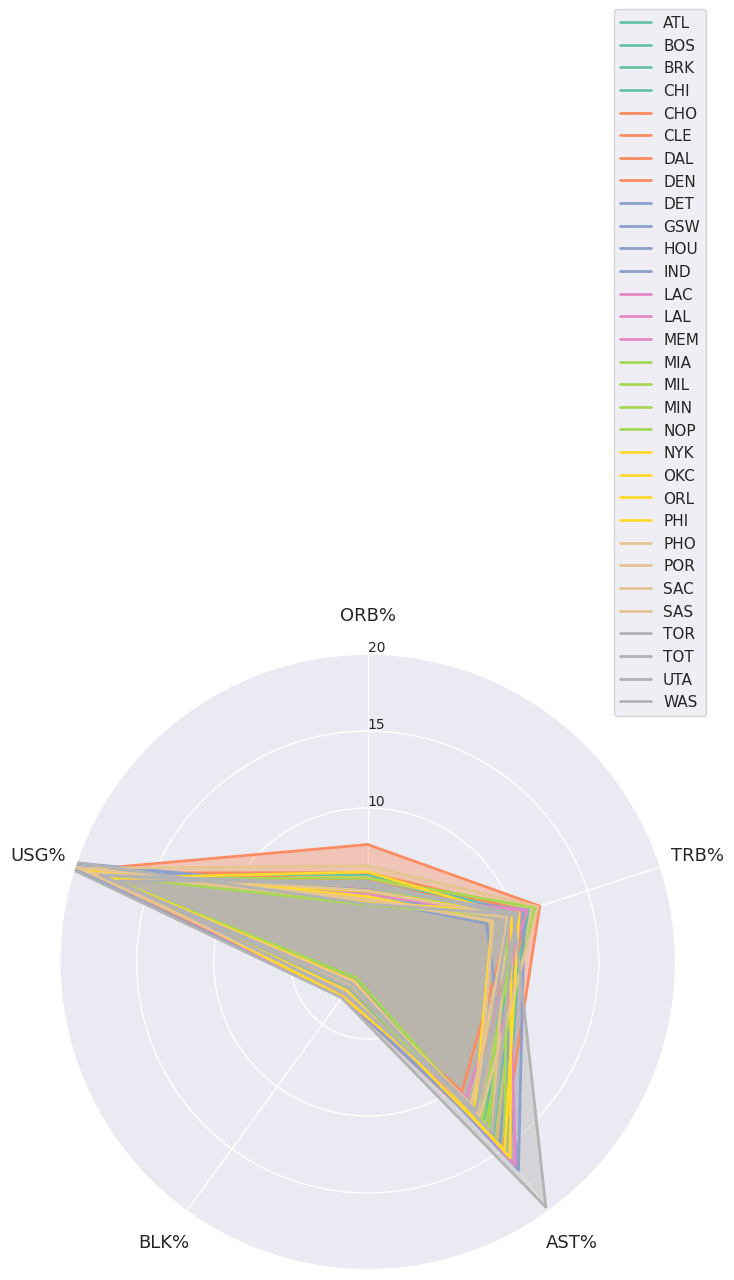

In [51]:
labels = df3.columns[1:]
num_labels = len(labels)

angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
angles += angles[:1]

my_palette = plt.cm.get_cmap("Set2", len(df3.index))

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
for i, row in df3.iterrows():
    color = my_palette(i)
    data = df3.iloc[i].drop('Tm').tolist()
    data += data[:1]

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], labels, fontsize=13)
    ax.tick_params(axis='x', which='major', pad=15)
    ax.set_rlabel_position(0)
    plt.yticks([0,5,10,15,20],['0','5','10','15','20'], fontsize=10)
    plt.ylim(0,20)

    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.Tm)
    ax.fill(angles, data, color=color, alpha=0.4)

plt.legend(loc=(0.9,0.9))
plt.show()

<Axes: >

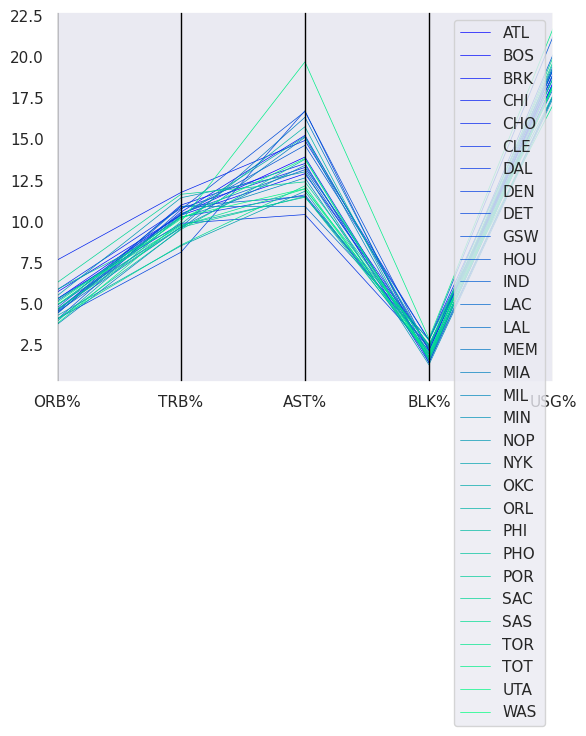

<Figure size 1600x800 with 0 Axes>

In [52]:
fig, axes = plt.subplots()
plt.figure(figsize=(16, 8))
parallel_coordinates(df3, 'Tm', ax=axes, colormap='winter', linewidth="0.5")

In [53]:
!pip install plotly

In [54]:
!pip install pywaffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 73.4 MB/s eta 0:00:00


In [63]:
import plotly.express as px
from pywaffle import waffle
plt.rcParams['figure.dpi'] = 100

In [56]:
df = pd.read_csv("six_countries_height_samples.csv")
df.head()

,id,country,sex,height_cm
0,rhop00001,AUSTRALIA,man,189
1,rhop00002,AUSTRALIA,man,165
2,rhop00003,AUSTRALIA,man,189
3,rhop00004,AUSTRALIA,man,164
4,rhop00005,AUSTRALIA,man,192


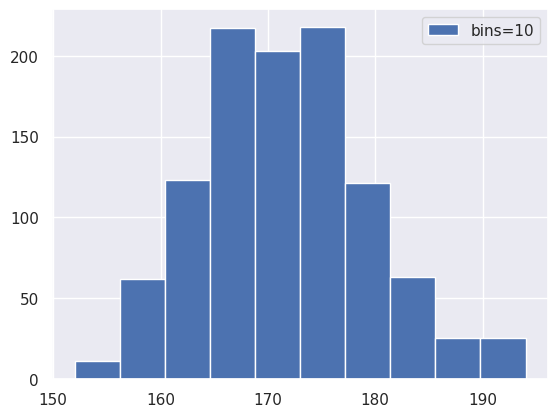

In [64]:
df1 = df[['height_cm']]

plt.hist(df1, bins=10, label='bins=10')
plt.legend()
plt.show()

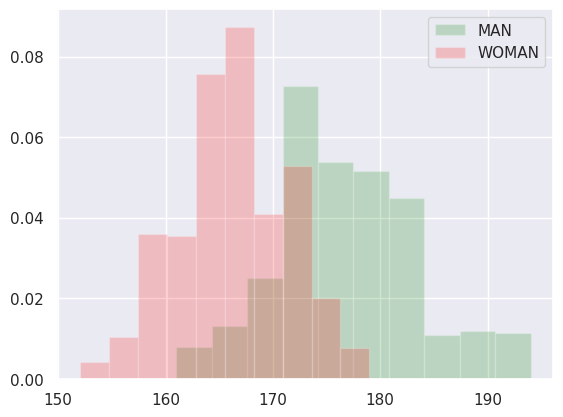

In [65]:
df1_1 = df[df['sex'].isin(['man'])]
df1_1 = df1_1[['height_cm']]
df1_2 = df[df['sex'].isin(['woman'])]
df1_2 = df1_2[['height_cm']]

plt.hist(df1_1, color = 'green', alpha = 0.2, bins = 10, label = 'MAN', density = True)
plt.hist(df1_2, color = 'red', alpha = 0.2, bins = 10, label = 'WOMAN', density = True)
plt.legend()
plt.show()

In [66]:
df2 = df[['country','height_cm']]
df2=df2[df.height_cm >= 175]
df2 = df2.groupby('country').count().reset_index()

df2.head(10)

,country,height_cm
0,AUSTRALIA,68
1,DENMARK,59
2,ITALY,67
3,JAPAN,46
4,KOREA,52
5,TURKEY,61


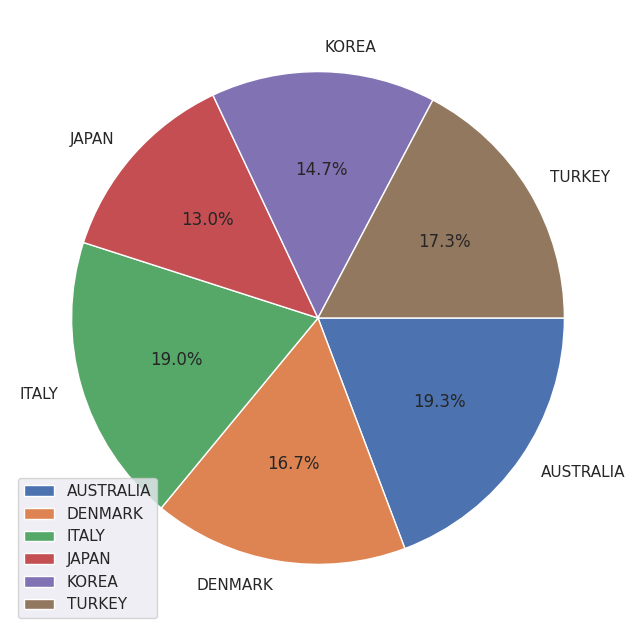

In [67]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.pie(df2.height_cm,
       labels=df2.country,
       startangle=0,
       counterclock=False,
       autopct=lambda p : '{:.1f}%'.format(p)
       )

plt.legend()
plt.show()

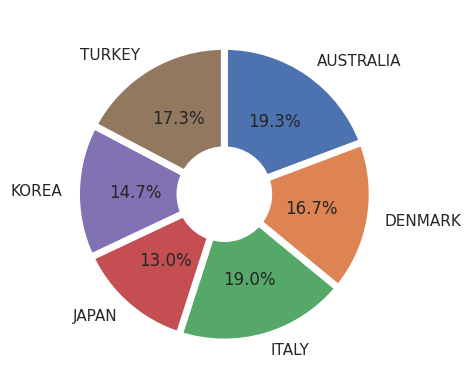

In [68]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df2.height_cm, labels=df2.country, autopct='%.1f%%',
        startangle=90, counterclock=False, wedgeprops=wedgeprops)
plt.show()

In [69]:
df3 = df[['country', 'sex', 'height_cm']]
df3=df3[df.height_cm >= 175]

df3 = df3.groupby(['country','sex']).count().reset_index()

df3.head(10)

,country,sex,height_cm
0,AUSTRALIA,man,59
1,AUSTRALIA,woman,9
2,DENMARK,man,53
3,DENMARK,woman,6
4,ITALY,man,60
5,ITALY,woman,7
6,JAPAN,man,45
7,JAPAN,woman,1
8,KOREA,man,50
9,KOREA,woman,2


In [70]:
fig = px.treemap(df3, path=['sex', 'country'], values='height_cm', color='height_cm', color_continuous_scale='viridis')
plt.show()

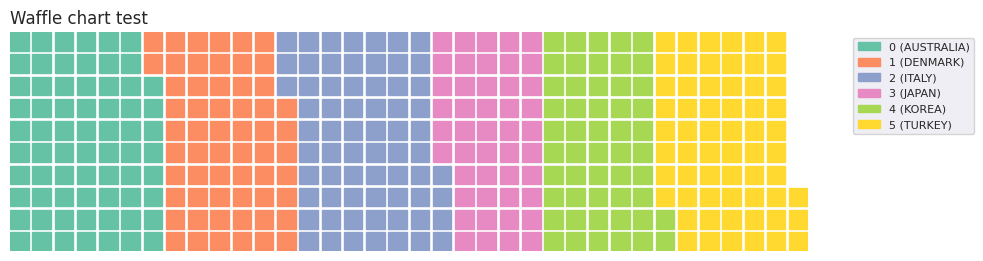

In [72]:
from pywaffle import Waffle
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {
            'values': df2['height_cm'],
            'labels': ["{0} ({1})".format(n, v) for n, v in df2['country'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Waffle chart test', 'loc': 'left'}
        }
    },
    rows=10,
    figsize=(10, 10)
)

In [73]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


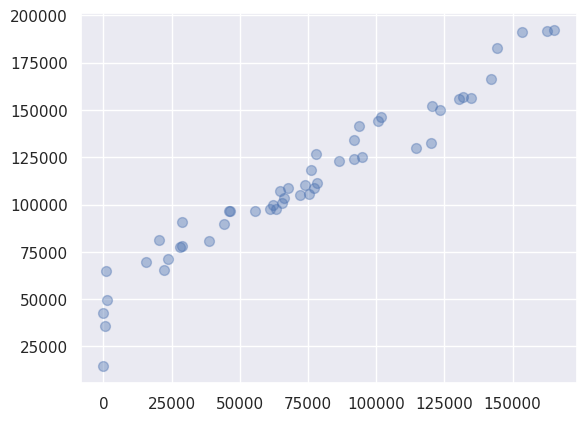

In [74]:
plt.scatter(df['R&D Spend'], df['Profit'], s=50, alpha=0.4)
plt.show()

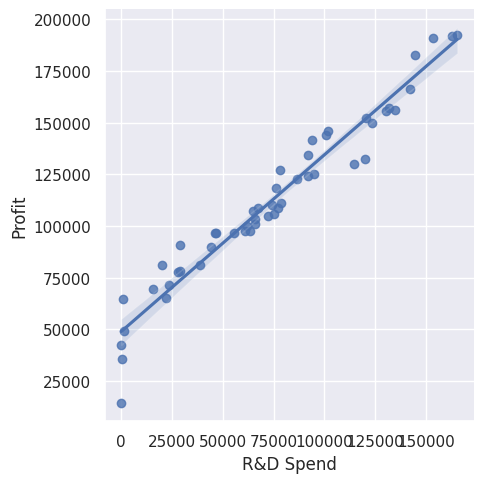

In [75]:
ax = sns.lmplot(x='R&D Spend', y='Profit', data=df)

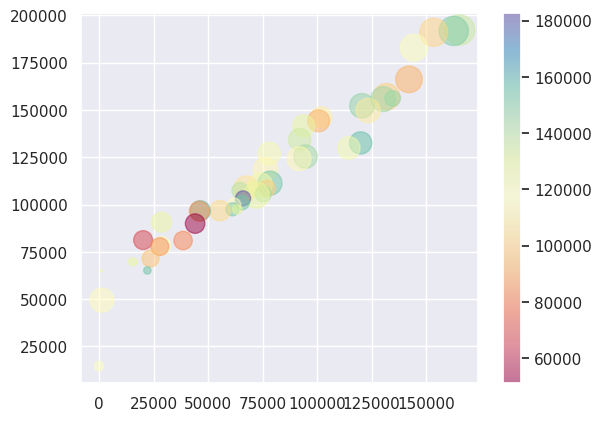

In [77]:
plt.scatter(df['R&D Spend'], df['Profit'], s=df['Marketing Spend']*0.001,
            c=df['Administration'], alpha=0.5, cmap='Spectral')
plt.colorbar()
plt.show()

In [78]:
!pip install folium
import folium
from folium import Marker
from folium import plugins
from folium import GeoJson
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [79]:
df=pd.read_csv("Starbucks_Seoul.csv")
geo="Seoul_Gu.json"

df.head()

,name,address,gu_name,latitude,longitude
0,GS타워,서울특별시 강남구 논현로 508 (역삼동),강남구,37.501859,127.037278
1,SSG마켓도곡R,"서울특별시 강남구 언주로30길 57, 타워팰리스Ⅱ F 지하1층 (도곡동)",강남구,37.490298,127.054895
2,W-Mall,서울특별시 금천구 디지털로 188 (가산동),금천구,37.477305,126.887691
3,가든파이브,서울특별시 송파구 충민로 10 (문정동) 가든파이브툴,송파구,37.478232,127.119370
4,가락본동,서울특별시 송파구 송파대로30길 13 (가락동),송파구,37.494895,127.118785


In [80]:
m = folium.Map(location=[37.541, 126.986], zoom_start=12)
m

In [81]:
m = folium.Map(location=[37.541, 126.986], tiles='Stamen Toner', zoom_start=12)

folium.CircleMarker([37.5538, 126.9810],radius=50,
                    popup='Laurelhurst Park', color='#3246cc',
                    fill_color='#3246cc').add_to(m)

folium.Marker([37.5538, 126.9810], popup='The Waterfront').add_to(m)

m

In [83]:
m = folium.Map([37.541, 126.986], zoom_start=12 ,width="%100", height="%100")
locations = list(zip(df.latitude, df.longitude))
cluster = plugins.MarkerCluster(locations=locations,
               popups=df["name"].tolist())
m.add_child(cluster)
m

In [82]:
m = folium.Map(location=[37.541, 126.986], zoom_start=12, width="%100", height="%100")
locations = list(zip(df.latitude, df.longitude))
for i in range(len(locations)):
    folium.CircleMarker(location=locations[i],radius=1).add_to(m)
m

In [84]:
df_m = df.groupby('gu_name').agg({'latitude':'mean',
                                  'longitude':'mean',
                                  'name':'count'}).reset_index()
df_m.head()

,gu_name,latitude,longitude,name
0,강남구,37.507603,127.044611,80
1,강동구,37.539914,127.137106,14
2,강북구,37.626866,127.026372,5
3,강서구,37.555716,126.841528,16
4,관악구,37.481759,126.944286,11


In [86]:
df2 =pd.read_csv("us_states_unemployment.csv")

us_geo = 'folium_us-states.json'

df2.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [87]:
m = folium.Map(location=[40,-98], zoom_start=3, tiles="Cartodb Positron")

m.choropleth(geo_data = us_geo,
               data = df2,
               columns = ['State','Unemployment'],
               key_on = 'feature.id',
               fill_color='YlGn',
               legend_name='실업률')

m

/usr/local/lib/python3.10/dist-packages/folium/folium.py:465: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [88]:
source_to_dest = zip([37.541,37.541,37.541,37.541,37.541],
                     [35.6804, 38.9072, 14.5995, 48.8566,55.7558],
                     [126.986,126.986,126.986,126.986,126.986],
                     [139.7690, -77.0369, 120.9842, 2.3522,37.6173])

fig = go.Figure()

for a, b, c, d in source_to_dest:
    fig.add_trace(go.Scattergeo(
                        lat = [a, b],
                        lon = [c, d],
                        mode = 'lines',
                        line = dict(width = 1, color="red"),
                        opacity = 0.5
                        ))

fig.update_layout(
                margin={"t":0,"b":0,"l":0, "r":0, "pad":0},
                showlegend=False,
                geo = dict(
                showcountries=True)
                )

fig.show()

In [89]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


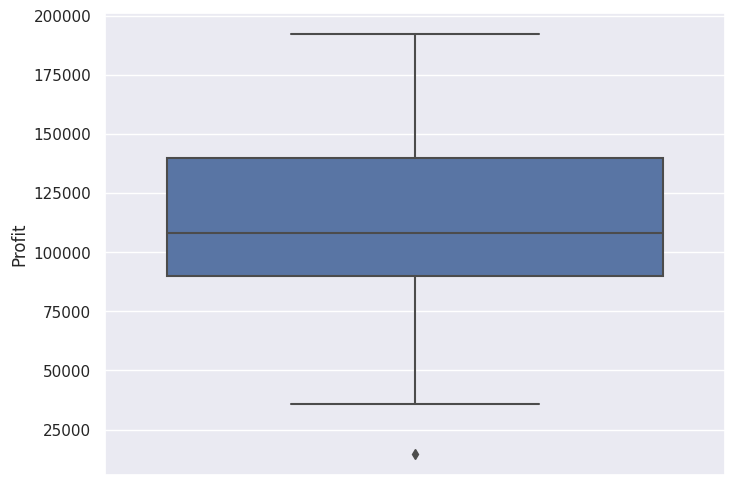

In [91]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Profit', data=df)
plt.show()

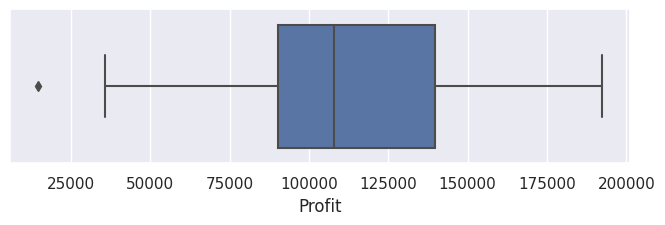

In [94]:
plt.figure(figsize=(8, 2))
sns.boxplot(x='Profit', data=df)
plt.show()

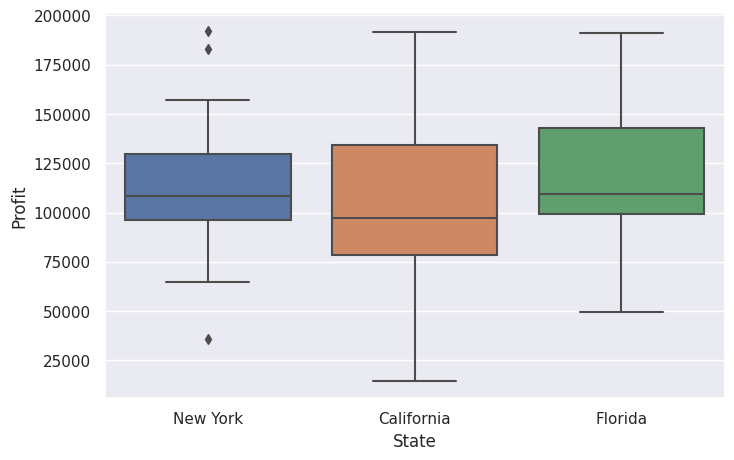

In [96]:
plt.figure(figsize=(8,5))
sns.boxplot(x="State", y="Profit", data=df)
plt.show()

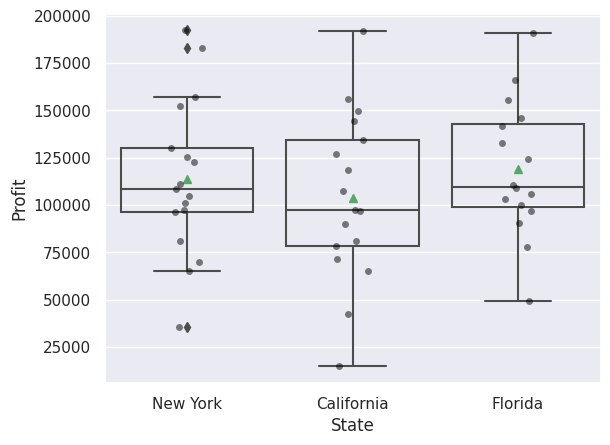

In [97]:
sns.boxplot(x='State', y ='Profit',
            showmeans=True,
            boxprops={'facecolor': 'None'},
            data=df)

sns.stripplot(x='State', y='Profit',
              data=df,
              jitter=True,
              marker='o',
              alpha=0.5,
              color='black')

plt.show()